# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [1]:
import pandas as pd
import numpy as np

In [197]:
transactions = pd.read_csv("D:\AA\Programming\Data Science\Maven-Analytics\Python\Data Analysis With Python AND Pandas\Pandas+Course+Resources\Pandas Course Resources\project_data/project_transactions.csv",
                          dtype = {    "HOUSEHOLD_KEY" : "int16",
                                        "BASKET_ID": "int64",
                                        "DAY" : "int16" ,
                                        "PRODUCT_ID":"int32",
                                        "QUANTITY" : "int32" , 
                                        "SALES_VALUE": "float32",
                                        "STORE_ID": "int32",
                                        "RETAIL_DISC": "float16",
                                        "WEEK_NO": "int8",
                                        "COUPON_DISC": "float16",
                                        "COUPON_MATCH_DISC":  "float16"})

In [128]:
transactions.info(memory_usage='deep' , show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   HOUSEHOLD_KEY      2146311 non-null  int64  
 1   BASKET_ID          2146311 non-null  int64  
 2   DAY                2146311 non-null  int16  
 3   PRODUCT_ID         2146311 non-null  int32  
 4   QUANTITY           2146311 non-null  int32  
 5   SALES_VALUE        2146311 non-null  float32
 6   STORE_ID           2146311 non-null  int32  
 7   RETAIL_DISC        2146311 non-null  float16
 8   WEEK_NO            2146311 non-null  int8   
 9   COUPON_DISC        2146311 non-null  float16
 10  COUPON_MATCH_DISC  2146311 non-null  float16
dtypes: float16(3), float32(1), int16(1), int32(3), int64(2), int8(1)
memory usage: 83.9 MB


In [5]:
transactions.describe(include="all").round(2)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.00,2.146311e+06,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00
mean,1056.23,3.404897e+10,389.51,2884714.94,100.97,3.11,3267.94,-0.53,56.33,-0.02,-0.00
std,605.01,4.723748e+09,190.05,3831949.29,1152.36,4.19,9122.39,1.23,27.15,0.21,0.04
min,1.00,2.698490e+10,1.00,25671.00,0.00,0.00,1.00,-130.02,1.00,-55.93,-7.70
25%,548.00,3.040798e+10,229.00,917231.00,1.00,1.29,330.00,-0.68,33.00,0.00,0.00
50%,1042.00,3.281176e+10,392.00,1027960.00,1.00,2.00,372.00,0.00,57.00,0.00,0.00
75%,1581.00,4.012804e+10,555.00,1132771.00,1.00,3.49,422.00,0.00,80.00,0.00,0.00
max,2099.00,4.230536e+10,711.00,18316298.00,89638.00,840.00,34280.00,3.99,102.00,0.00,0.00


In [7]:
transactions.nunique()

household_key          2099
BASKET_ID            232939
DAY                     711
PRODUCT_ID            84138
QUANTITY              10593
SALES_VALUE            5327
STORE_ID                526
RETAIL_DISC            2279
WEEK_NO                 102
COUPON_DISC             370
COUPON_MATCH_DISC        79
dtype: int64

In [124]:
transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [207]:
transactions.columns = [cols.upper() for cols in transactions.columns]
transactions.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'WEEK_NO'],
      dtype='object')

In [15]:
transactions.describe(include= "all").loc[["min","max"] , :]

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.02,1.0,-55.93,-7.7
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,3.99,102.0,0.00,0.0


In [127]:
transactions.info(memory_usage="deep" , show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   HOUSEHOLD_KEY      2146311 non-null  int64  
 1   BASKET_ID          2146311 non-null  int64  
 2   DAY                2146311 non-null  int16  
 3   PRODUCT_ID         2146311 non-null  int32  
 4   QUANTITY           2146311 non-null  int32  
 5   SALES_VALUE        2146311 non-null  float32
 6   STORE_ID           2146311 non-null  int32  
 7   RETAIL_DISC        2146311 non-null  float16
 8   WEEK_NO            2146311 non-null  int8   
 9   COUPON_DISC        2146311 non-null  float16
 10  COUPON_MATCH_DISC  2146311 non-null  float16
dtypes: float16(3), float32(1), int16(1), int32(3), int64(2), int8(1)
memory usage: 83.9 MB


In [19]:
transactions["SALES_VALUE"].describe().round(1)

count    2146311.0
mean           3.1
std            4.2
min            0.0
25%            1.3
50%            2.0
75%            3.5
max          840.0
Name: SALES_VALUE, dtype: float64

In [20]:
transactions.duplicated().sum()

0

In [140]:
#How many unique households and products are there in the data? The fields household_key and Product_ID will help here
List_Operation = ["HOUSEHOLD_KEY" , "PRODUCT_ID"]
for word in List_Operation:
    print(f"{word} series has {transactions[word].nunique()} unique elements.")

HOUSEHOLD_KEY series has 2099 unique elements.
PRODUCT_ID series has 84138 unique elements.


In [143]:
for i,col in enumerate(transactions.columns):
    print(f"The series {transactions.columns[i]} has {transactions[col].nunique()} unique elements.")

The series HOUSEHOLD_KEY has 2099 unique elements.
The series BASKET_ID has 232939 unique elements.
The series DAY has 711 unique elements.
The series PRODUCT_ID has 84138 unique elements.
The series QUANTITY has 10593 unique elements.
The series SALES_VALUE has 5327 unique elements.
The series STORE_ID has 526 unique elements.
The series RETAIL_DISC has 2149 unique elements.
The series WEEK_NO has 102 unique elements.
The series COUPON_DISC has 368 unique elements.
The series COUPON_MATCH_DISC has 79 unique elements.


In [24]:
for col in transactions.columns:
    print(transactions[col].info());

<class 'pandas.core.series.Series'>
RangeIndex: 2146311 entries, 0 to 2146310
Series name: HOUSEHOLD_KEY
Non-Null Count    Dtype
--------------    -----
2146311 non-null  int16
dtypes: int16(1)
memory usage: 4.1 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2146311 entries, 0 to 2146310
Series name: BASKET_ID
Non-Null Count    Dtype
--------------    -----
2146311 non-null  int64
dtypes: int64(1)
memory usage: 16.4 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2146311 entries, 0 to 2146310
Series name: DAY
Non-Null Count    Dtype
--------------    -----
2146311 non-null  int16
dtypes: int16(1)
memory usage: 4.1 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2146311 entries, 0 to 2146310
Series name: PRODUCT_ID
Non-Null Count    Dtype
--------------    -----
2146311 non-null  int32
dtypes: int32(1)
memory usage: 8.2 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2146311 entries, 0 to 2146310
Series name: QUANTITY
Non-Null Count    Dtype
------------

In [26]:
for col in transactions.columns:
    print(col)

HOUSEHOLD_KEY
BASKET_ID
DAY
PRODUCT_ID
QUANTITY
SALES_VALUE
STORE_ID
RETAIL_DISC
WEEK_NO
COUPON_DISC
COUPON_MATCH_DISC


## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [181]:
transactions = (transactions.
    assign(
        TOTAL_DISCOUNT = transactions["RETAIL_DISC"].add(transactions["COUPON_DISC"]),
        PERCENTAGE_DISCOUNT = (lambda x : (x["TOTAL_DISCOUNT"] / x["SALES_VALUE"]).round(2).abs())
    )
)

In [184]:
transactions.PERCENTAGE_DISCOUNT

0          0.00
1          0.13
2          0.00
3          0.40
4          1.32
           ... 
2146306    0.00
2146307    0.00
2146308    0.00
2146309    0.11
2146310    0.00
Name: PERCENTAGE_DISCOUNT, Length: 2146311, dtype: float32

In [201]:
transactions["PERCENTAGE_DISCOUNT"] = np.where(transactions["PERCENTAGE_DISCOUNT"] > 1 , 1 , 0)

KeyError: 'PERCENTAGE_DISCOUNT'

In [198]:
transactions.head(10)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.000000,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.399902,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.000000,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.990234,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.790039,1,0.0,0.0
5,1130,26984905972,1,833715,2,0.34,31642,-0.320068,1,0.0,0.0
6,1130,26984905972,1,866950,2,0.34,31642,-0.320068,1,0.0,0.0
7,1130,26984905972,1,1022843,2,0.34,31642,-0.320068,1,0.0,0.0
8,1130,26984905972,1,1048462,1,1.19,31642,-0.799805,1,0.0,0.0
9,1130,26984905972,1,1071333,2,0.34,31642,-0.320068,1,0.0,0.0


In [199]:
(transactions.
 drop(columns = ["RETAIL_DISC" , "COUPON_DISC" , "COUPON_MATCH_DISC"] , axis = 1, inplace = True)
)

In [202]:
transactions.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'WEEK_NO'],
      dtype='object')

In [31]:
transactions["total_discount"] = transactions["RETAIL_DISC"].add(transactions["COUPON_DISC"])
transactions[["total_discount"]]

,total_discount
0,0.000000
1,-0.399902
2,0.000000
3,-0.990234
4,-0.790039
...,...
2146306,0.000000
2146307,0.000000
2146308,0.000000
2146309,-0.489990


In [32]:
transactions["%_discount"] = (transactions["total_discount"].abs() / transactions["SALES_VALUE"]).round(2)
transactions["%_discount"] <0

0          False
1          False
2          False
3          False
4          False
           ...  
2146306    False
2146307    False
2146308    False
2146309    False
2146310    False
Name: %_discount, Length: 2146311, dtype: bool

In [33]:
conditions = [
    (transactions["%_discount"] <= 0) , 
    (transactions["%_discount"] >=1),
]

choices = [0,1]
transactions["%_discount"] = np.select(conditions , choices)
transactions[["%_discount"]]

,%_discount
0,0
1,0
2,0
3,0
4,1
...,...
2146306,0
2146307,0
2146308,0
2146309,0


In [34]:
transactions["%_discount"] = (transactions["%_discount"]
                              .apply(lambda x : 0 if x <=0  else 1 if x >=1  else x))
transactions[["%_discount"]]

,%_discount
0,0
1,0
2,0
3,0
4,1
...,...
2146306,0
2146307,0
2146308,0
2146309,0


In [35]:
transactions.drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"] , axis = 1)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,Total_Discount,Percentage_Discount,total_discount,%_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.000000,0.000000,0.000000,0
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.399902,0.133747,-0.399902,0
2,1364,26984896261,1,920955,1,3.09,31742,1,0.000000,0.000000,0.000000,0
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.990234,0.396094,-0.990234,0
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.790039,1.316732,-0.790039,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.000000,0.000000,0.000000,0
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.000000,0.000000,0.000000,0
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.000000,0.000000,0.000000,0
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-0.489990,0.108887,-0.489990,0


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [36]:
total_sales = transactions["SALES_VALUE"].sum()
f'${total_sales.round(2)}'

'$6666244.5'

In [204]:
transactions.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'WEEK_NO'],
      dtype='object')

In [203]:
total_discount = transactions["total_discount"].sum()
f'${total_discount.round(2)}'

KeyError: 'total_discount'

In [38]:
overall_percen_discount = (total_discount / total_sales).round(2)
overall_percen_discount

-inf

In [39]:
total_qty_sold = transactions["QUANTITY"].sum()
total_qty_sold

216713611

In [40]:
transactions.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'WEEK_NO', 'COUPON_DISC',
       'COUPON_MATCH_DISC', 'Total_Discount', 'Percentage_Discount',
       'total_discount', '%_discount'],
      dtype='object')

In [41]:
sales_per_basket = (total_sales /transactions["BASKET_ID"].nunique()).round(2)
sales_per_basket

28.62

In [42]:
sales_per_household = (total_sales / transactions["HOUSEHOLD_KEY"].nunique()).round(2)
sales_per_household

3175.91

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


In [43]:
transactions

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Total_Discount,Percentage_Discount,total_discount,%_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.000000,1,0.0,0.0,0.000000,0.000000,0.000000,0
1,1364,26984896261,1,897044,1,2.99,31742,-0.399902,1,0.0,0.0,-0.399902,0.133747,-0.399902,0
2,1364,26984896261,1,920955,1,3.09,31742,0.000000,1,0.0,0.0,0.000000,0.000000,0.000000,0
3,1364,26984896261,1,937406,1,2.50,31742,-0.990234,1,0.0,0.0,-0.990234,0.396094,-0.990234,0
4,1364,26984896261,1,981760,1,0.60,31742,-0.790039,1,0.0,0.0,-0.790039,1.316732,-0.790039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.000000,102,0.0,0.0,0.000000,0.000000,0.000000,0
2146307,1598,42305362535,711,114102,1,8.89,3228,0.000000,102,0.0,0.0,0.000000,0.000000,0.000000,0
2146308,1598,42305362535,711,133449,1,6.99,3228,0.000000,102,0.0,0.0,0.000000,0.000000,0.000000,0
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.489990,102,0.0,0.0,-0.489990,0.108887,-0.489990,0


In [44]:
transactions.groupby(["STORE_ID" , "HOUSEHOLD_KEY"])[["COUPON_DISC"]].count()

COUPON_DISC
STORE_ID HOUSEHOLD_KEY             
1        1172                     1
         2009                     3
21       670                      4
22       817                      4
27       168                     26
...                             ...
34280    1944                   614
         2041                   136
         2057                     2
         2075                   392
         2082                   257

[11421 rows x 1 columns]

In [45]:
(transactions
 .groupby(by = ["STORE_ID" , "WEEK_NO"])[["SALES_VALUE" , "total_discount"]]
 .agg(['sum' , 'count'])
)

SALES_VALUE       total_discount      
                          sum count            sum count
STORE_ID WEEK_NO                                        
1        5          22.400000     2      -0.720215     2
         6           5.000000     1      -0.239990     1
         14          2.490000     1       0.000000     1
21       8           7.350000     4      -2.909912     4
22       32         24.770000     4      -1.219727     4
...                       ...   ...            ...   ...
34280    98       2179.979980   428    -224.055130   428
         99       1448.910034   411    -246.128693   411
         100      1400.199951   384    -167.341125   384
         101      1751.050049   400    -216.217621   400
         102      1451.040039   370    -181.328369   370

[13210 rows x 4 columns]

In [46]:
tr_gr = (transactions
 .groupby(by = ["STORE_ID" , "WEEK_NO"])
 .agg({"SALES_VALUE" : ['sum' , 'count' ,'mean'] , "total_discount" : 'sum' })
).round(2)
tr_gr

SALES_VALUE              total_discount
                          sum count   mean            sum
STORE_ID WEEK_NO                                         
1        5          22.400000     2  11.20      -0.720000
         6           5.000000     1   5.00      -0.240000
         14          2.490000     1   2.49       0.000000
21       8           7.350000     4   1.84      -2.910000
22       32         24.770000     4   6.19      -1.220000
...                       ...   ...    ...            ...
34280    98       2179.979980   428   5.09    -224.059998
         99       1448.910034   411   3.53    -246.130005
         100      1400.199951   384   3.65    -167.339996
         101      1751.050049   400   4.38    -216.220001
         102      1451.040039   370   3.92    -181.330002

[13210 rows x 4 columns]

In [47]:
# tr_gr[("SALES_VALUE" , 'mean')] = tr_gr[("SALES_VALUE" , 'mean')].round(2)
# tr_gr[("SALES_VALUE" , 'sum' )] = tr_gr[("SALES_VALUE" , 'sum' )].round(2)
# tr_gr[("total_discount" , 'sum' )] = tr_gr[("total_discount" , 'sum' )].round(2)
tr_gr.round(2)

SALES_VALUE              total_discount
                          sum count   mean            sum
STORE_ID WEEK_NO                                         
1        5          22.400000     2  11.20      -0.720000
         6           5.000000     1   5.00      -0.240000
         14          2.490000     1   2.49       0.000000
21       8           7.350000     4   1.84      -2.910000
22       32         24.770000     4   6.19      -1.220000
...                       ...   ...    ...            ...
34280    98       2179.979980   428   5.09    -224.059998
         99       1448.910034   411   3.53    -246.130005
         100      1400.199951   384   3.65    -167.339996
         101      1751.050049   400   4.38    -216.220001
         102      1451.040039   370   3.92    -181.330002

[13210 rows x 4 columns]

In [48]:
transactions.head(3)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Total_Discount,Percentage_Discount,total_discount,%_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.000000,1,0.0,0.0,0.000000,0.000000,0.000000,0
1,1364,26984896261,1,897044,1,2.99,31742,-0.399902,1,0.0,0.0,-0.399902,0.133747,-0.399902,0
2,1364,26984896261,1,920955,1,3.09,31742,0.000000,1,0.0,0.0,0.000000,0.000000,0.000000,0


In [49]:
tr_gr = (transactions
 .groupby(by = ["STORE_ID" , "WEEK_NO" , "HOUSEHOLD_KEY"])
 .agg({"SALES_VALUE" : ['sum' , 'count'] , 
       "total_discount" : 'sum' , 
      "HOUSEHOLD_KEY" : ['min' , 'max' , 'mean' , 'median']})
)
tr_gr.round(2)

SALES_VALUE       total_discount HOUSEHOLD_KEY  \
                                       sum count            sum           min   
STORE_ID WEEK_NO HOUSEHOLD_KEY                                                  
1        5       2009            22.400000     2      -0.720000          2009   
         6       2009             5.000000     1      -0.240000          2009   
         14      1172             2.490000     1       0.000000          1172   
21       8       670              7.350000     4      -2.910000           670   
22       32      817             24.770000     4      -1.220000           817   
...                                    ...   ...            ...           ...   
34280    102     1844            15.000000     2       0.000000          1844   
                 1936            34.740002     9      -5.210000          1936   
                 2041             2.880000     1      -1.410000          2041   
                 2075           187.630005    69     -49.549999          2075   
                 2082            23.790001    10      -1.960000          2082   

                                                      
                                 max    mean  median  
STORE_ID WEEK_NO HOUSEHOLD_KEY                        
1        5       2009           2009  2009.0  2009.0  
         6       2009           2009  2009.0  2009.0  
         14      1172           1172  1172.0  1172.0  
21       8       670             670   670.0   670.0  
22       32      817             817   817.0   817.0  
...                              ...     ...     ...  
34280    102     1844           1844  1844.0  1844.0  
                 1936           1936  1936.0  1936.0  
                 2041           2041  2041.0  2041.0  
                 2075           2075  2075.0  2075.0  
                 2082           2082  2082.0  2082.0  

[130791 rows x 7 columns]

In [51]:
print(1)

1


In [72]:
tr_gr.droplevel(0 , axis = 0)

SALES_VALUE       total_discount HOUSEHOLD_KEY        \
                              sum count            sum           min   max   
WEEK_NO HOUSEHOLD_KEY                                                        
5       2009            22.400000     2      -0.720215          2009  2009   
6       2009             5.000000     1      -0.239990          2009  2009   
14      1172             2.490000     1       0.000000          1172  1172   
8       670              7.350000     4      -2.909912           670   670   
32      817             24.770000     4      -1.219727           817   817   
...                           ...   ...            ...           ...   ...   
102     1844            15.000000     2       0.000000          1844  1844   
        1936            34.740002     9      -5.209961          1936  1936   
        2041             2.880000     1      -1.410156          2041  2041   
        2075           187.630005    69     -49.545105          2075  2075   
        2082            23.790001    10      -1.959961          2082  2082   

                                       
                         mean  median  
WEEK_NO HOUSEHOLD_KEY                  
5       2009           2009.0  2009.0  
6       2009           2009.0  2009.0  
14      1172           1172.0  1172.0  
8       670             670.0   670.0  
32      817             817.0   817.0  
...                       ...     ...  
102     1844           1844.0  1844.0  
        1936           1936.0  1936.0  
        2041           2041.0  2041.0  
        2075           2075.0  2075.0  
        2082           2082.0  2082.0  

[130791 rows x 7 columns]

In [73]:
tr_gr.droplevel(1 , axis = 0)

SALES_VALUE       total_discount HOUSEHOLD_KEY        \
                               sum count            sum           min   max   
STORE_ID HOUSEHOLD_KEY                                                        
1        2009            22.400000     2      -0.720215          2009  2009   
         2009             5.000000     1      -0.239990          2009  2009   
         1172             2.490000     1       0.000000          1172  1172   
21       670              7.350000     4      -2.909912           670   670   
22       817             24.770000     4      -1.219727           817   817   
...                            ...   ...            ...           ...   ...   
34280    1844            15.000000     2       0.000000          1844  1844   
         1936            34.740002     9      -5.209961          1936  1936   
         2041             2.880000     1      -1.410156          2041  2041   
         2075           187.630005    69     -49.545105          2075  2075   
         2082            23.790001    10      -1.959961          2082  2082   

                                        
                          mean  median  
STORE_ID HOUSEHOLD_KEY                  
1        2009           2009.0  2009.0  
         2009           2009.0  2009.0  
         1172           1172.0  1172.0  
21       670             670.0   670.0  
22       817             817.0   817.0  
...                        ...     ...  
34280    1844           1844.0  1844.0  
         1936           1936.0  1936.0  
         2041           2041.0  2041.0  
         2075           2075.0  2075.0  
         2082           2082.0  2082.0  

[130791 rows x 7 columns]

In [74]:
tr_gr.droplevel(2 , axis = 0)

SALES_VALUE       total_discount HOUSEHOLD_KEY                \
                         sum count            sum           min   max    mean   
STORE_ID WEEK_NO                                                                
1        5         22.400000     2      -0.720215          2009  2009  2009.0   
         6          5.000000     1      -0.239990          2009  2009  2009.0   
         14         2.490000     1       0.000000          1172  1172  1172.0   
21       8          7.350000     4      -2.909912           670   670   670.0   
22       32        24.770000     4      -1.219727           817   817   817.0   
...                      ...   ...            ...           ...   ...     ...   
34280    102       15.000000     2       0.000000          1844  1844  1844.0   
         102       34.740002     9      -5.209961          1936  1936  1936.0   
         102        2.880000     1      -1.410156          2041  2041  2041.0   
         102      187.630005    69     -49.545105          2075  2075  2075.0   
         102       23.790001    10      -1.959961          2082  2082  2082.0   

                          
                  median  
STORE_ID WEEK_NO          
1        5        2009.0  
         6        2009.0  
         14       1172.0  
21       8         670.0  
22       32        817.0  
...                  ...  
34280    102      1844.0  
         102      1936.0  
         102      2041.0  
         102      2075.0  
         102      2082.0  

[130791 rows x 7 columns]

In [79]:
tr_gr.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [81]:
tr_gr

SALES_VALUE       total_discount HOUSEHOLD_KEY  \
                                       sum count            sum           min   
STORE_ID WEEK_NO HOUSEHOLD_KEY                                                  
1        5       2009            22.400000     2      -0.720215          2009   
         6       2009             5.000000     1      -0.239990          2009   
         14      1172             2.490000     1       0.000000          1172   
21       8       670              7.350000     4      -2.909912           670   
22       32      817             24.770000     4      -1.219727           817   
...                                    ...   ...            ...           ...   
34280    102     1844            15.000000     2       0.000000          1844   
                 1936            34.740002     9      -5.209961          1936   
                 2041             2.880000     1      -1.410156          2041   
                 2075           187.630005    69     -49.545105          2075   
                 2082            23.790001    10      -1.959961          2082   

                                                      
                                 max    mean  median  
STORE_ID WEEK_NO HOUSEHOLD_KEY                        
1        5       2009           2009  2009.0  2009.0  
         6       2009           2009  2009.0  2009.0  
         14      1172           1172  1172.0  1172.0  
21       8       670             670   670.0   670.0  
22       32      817             817   817.0   817.0  
...                              ...     ...     ...  
34280    102     1844           1844  1844.0  1844.0  
                 1936           1936  1936.0  1936.0  
                 2041           2041  2041.0  2041.0  
                 2075           2075  2075.0  2075.0  
                 2082           2082  2082.0  2082.0  

[130791 rows x 7 columns]

In [85]:
tr_gr

SALES_VALUE       total_discount HOUSEHOLD_KEY  \
                                       sum count            sum           min   
STORE_ID WEEK_NO HOUSEHOLD_KEY                                                  
1        5       2009            22.400000     2      -0.720215          2009   
         6       2009             5.000000     1      -0.239990          2009   
         14      1172             2.490000     1       0.000000          1172   
21       8       670              7.350000     4      -2.909912           670   
22       32      817             24.770000     4      -1.219727           817   
...                                    ...   ...            ...           ...   
34280    102     1844            15.000000     2       0.000000          1844   
                 1936            34.740002     9      -5.209961          1936   
                 2041             2.880000     1      -1.410156          2041   
                 2075           187.630005    69     -49.545105          2075   
                 2082            23.790001    10      -1.959961          2082   

                                                      
                                 max    mean  median  
STORE_ID WEEK_NO HOUSEHOLD_KEY                        
1        5       2009           2009  2009.0  2009.0  
         6       2009           2009  2009.0  2009.0  
         14      1172           1172  1172.0  1172.0  
21       8       670             670   670.0   670.0  
22       32      817             817   817.0   817.0  
...                              ...     ...     ...  
34280    102     1844           1844  1844.0  1844.0  
                 1936           1936  1936.0  1936.0  
                 2041           2041  2041.0  2041.0  
                 2075           2075  2075.0  2075.0  
                 2082           2082  2082.0  2082.0  

[130791 rows x 7 columns]

In [84]:
tr_gr.droplevel(0, axis = 0)

SALES_VALUE       total_discount HOUSEHOLD_KEY        \
                              sum count            sum           min   max   
WEEK_NO HOUSEHOLD_KEY                                                        
5       2009            22.400000     2      -0.720215          2009  2009   
6       2009             5.000000     1      -0.239990          2009  2009   
14      1172             2.490000     1       0.000000          1172  1172   
8       670              7.350000     4      -2.909912           670   670   
32      817             24.770000     4      -1.219727           817   817   
...                           ...   ...            ...           ...   ...   
102     1844            15.000000     2       0.000000          1844  1844   
        1936            34.740002     9      -5.209961          1936  1936   
        2041             2.880000     1      -1.410156          2041  2041   
        2075           187.630005    69     -49.545105          2075  2075   
        2082            23.790001    10      -1.959961          2082  2082   

                                       
                         mean  median  
WEEK_NO HOUSEHOLD_KEY                  
5       2009           2009.0  2009.0  
6       2009           2009.0  2009.0  
14      1172           1172.0  1172.0  
8       670             670.0   670.0  
32      817             817.0   817.0  
...                       ...     ...  
102     1844           1844.0  1844.0  
        1936           1936.0  1936.0  
        2041           2041.0  2041.0  
        2075           2075.0  2075.0  
        2082           2082.0  2082.0  

[130791 rows x 7 columns]

In [89]:
tr_gr.droplevel(0 , axis = 1)

sum  count        sum   min   max  \
STORE_ID WEEK_NO HOUSEHOLD_KEY                                             
1        5       2009            22.400000      2  -0.720215  2009  2009   
         6       2009             5.000000      1  -0.239990  2009  2009   
         14      1172             2.490000      1   0.000000  1172  1172   
21       8       670              7.350000      4  -2.909912   670   670   
22       32      817             24.770000      4  -1.219727   817   817   
...                                    ...    ...        ...   ...   ...   
34280    102     1844            15.000000      2   0.000000  1844  1844   
                 1936            34.740002      9  -5.209961  1936  1936   
                 2041             2.880000      1  -1.410156  2041  2041   
                 2075           187.630005     69 -49.545105  2075  2075   
                 2082            23.790001     10  -1.959961  2082  2082   

                                  mean  median  
STORE_ID WEEK_NO HOUSEHOLD_KEY                  
1        5       2009           2009.0  2009.0  
         6       2009           2009.0  2009.0  
         14      1172           1172.0  1172.0  
21       8       670             670.0   670.0  
22       32      817             817.0   817.0  
...                                ...     ...  
34280    102     1844           1844.0  1844.0  
                 1936           1936.0  1936.0  
                 2041           2041.0  2041.0  
                 2075           2075.0  2075.0  
                 2082           2082.0  2082.0  

[130791 rows x 7 columns]

In [58]:
transactions.head(10)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Total_Discount,Percentage_Discount,total_discount,%_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.000000,1,0.0,0.0,0.000000,0.000000,0.000000,0
1,1364,26984896261,1,897044,1,2.99,31742,-0.399902,1,0.0,0.0,-0.399902,0.133747,-0.399902,0
2,1364,26984896261,1,920955,1,3.09,31742,0.000000,1,0.0,0.0,0.000000,0.000000,0.000000,0
3,1364,26984896261,1,937406,1,2.50,31742,-0.990234,1,0.0,0.0,-0.990234,0.396094,-0.990234,0
4,1364,26984896261,1,981760,1,0.60,31742,-0.790039,1,0.0,0.0,-0.790039,1.316732,-0.790039,1
5,1130,26984905972,1,833715,2,0.34,31642,-0.320068,1,0.0,0.0,-0.320068,0.941378,-0.320068,0
6,1130,26984905972,1,866950,2,0.34,31642,-0.320068,1,0.0,0.0,-0.320068,0.941378,-0.320068,0
7,1130,26984905972,1,1022843,2,0.34,31642,-0.320068,1,0.0,0.0,-0.320068,0.941378,-0.320068,0
8,1130,26984905972,1,1048462,1,1.19,31642,-0.799805,1,0.0,0.0,-0.799805,0.672105,-0.799805,0
9,1130,26984905972,1,1071333,2,0.34,31642,-0.320068,1,0.0,0.0,-0.320068,0.941378,-0.320068,0


In [59]:
transactions.pivot_table(index = ["STORE_ID" , "DAY"]).head(10)

%_discount     BASKET_ID  COUPON_DISC  COUPON_MATCH_DISC  \
STORE_ID DAY                                                             
1        29     0.000000  2.733366e+10     0.000000           0.000000   
         34     0.000000  2.739704e+10     0.000000           0.000000   
         96     0.000000  2.814069e+10     0.000000           0.000000   
21       50     0.000000  2.758950e+10     0.000000           0.000000   
         51     0.000000  2.760081e+10     0.000000           0.000000   
22       218    0.000000  3.012893e+10     0.000000           0.000000   
27       3      0.000000  2.702069e+10     0.000000           0.000000   
         4      0.000000  2.703077e+10     0.000000           0.000000   
         14     0.061224  2.715326e+10    -0.003572          -0.003572   
         19     0.000000  2.721280e+10     0.000000           0.000000   

              HOUSEHOLD_KEY    PRODUCT_ID  Percentage_Discount     QUANTITY  \
STORE_ID DAY                                                                  
1        29          2009.0  5.991200e+05             0.024007  3625.000000   
         34          2009.0  4.800140e+05             0.047998  2438.000000   
         96          1172.0  6.903760e+06             0.000000     1.000000   
21       50           670.0  6.128835e+05             0.345269     1.000000   
         51           670.0  3.326380e+06             0.475231     1.000000   
22       218          817.0  7.279680e+05             0.172278     1.000000   
27       3           2009.0  6.379170e+05             0.674769     1.000000   
         4           2009.0  3.468842e+06             0.130431     1.583333   
         14          2009.0  1.493877e+06             0.350997     1.163265   
         19          2009.0  1.431374e+06             0.141110     1.066667   

              RETAIL_DISC  SALES_VALUE  Total_Discount  WEEK_NO  \
STORE_ID DAY                                                      
1        29     -0.360107    11.200000       -0.360107        5   
         34     -0.239990     5.000000       -0.239990        6   
         96      0.000000     2.490000        0.000000       14   
21       50     -0.950073     2.290000       -0.950073        8   
         51     -0.504883     1.385000       -0.504883        8   
22       218    -0.304932     6.192500       -0.304932       32   
27       3      -0.560059     0.830000       -0.560059        1   
         4      -0.282532     2.646667       -0.282532        1   
         14     -0.885036     2.722143       -0.888611        3   
         19     -0.342692     3.586000       -0.342692        3   

              total_discount  
STORE_ID DAY                  
1        29        -0.360107  
         34        -0.239990  
         96         0.000000  
21       50        -0.950073  
         51        -0.504883  
22       218       -0.304932  
27       3         -0.560059  
         4         -0.282532  
         14        -0.888611  
         19        -0.342692

In [60]:
transactions["SALES_VALUE"].argmax()

894515

In [61]:
transactions["SALES_VALUE"].max()

840.0

In [62]:
transactions["SALES_VALUE"][894515]

840.0

In [63]:
transactions["SALES_VALUE"][transactions["SALES_VALUE"].argmax()] == transactions["SALES_VALUE"].max()

True

In [102]:
transactions.groupby(["HOUSEHOLD_KEY",'DAY']).agg({"SALES_VALUE":['sum','mean']})

SALES_VALUE          
                          sum      mean
HOUSEHOLD_KEY DAY                      
1             51    78.660004  2.622000
              67    41.099998  3.425000
              88    26.900000  2.241667
              94    63.430000  2.757826
              101   53.450001  3.144118
...                       ...       ...
2099          665   11.040000  2.208000
              669   16.780001  1.678000
              693   12.910000  1.844286
              695    2.780000  2.780000
              696    2.780000  2.780000

[190254 rows x 2 columns]

In [219]:
"https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html"

'https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html'

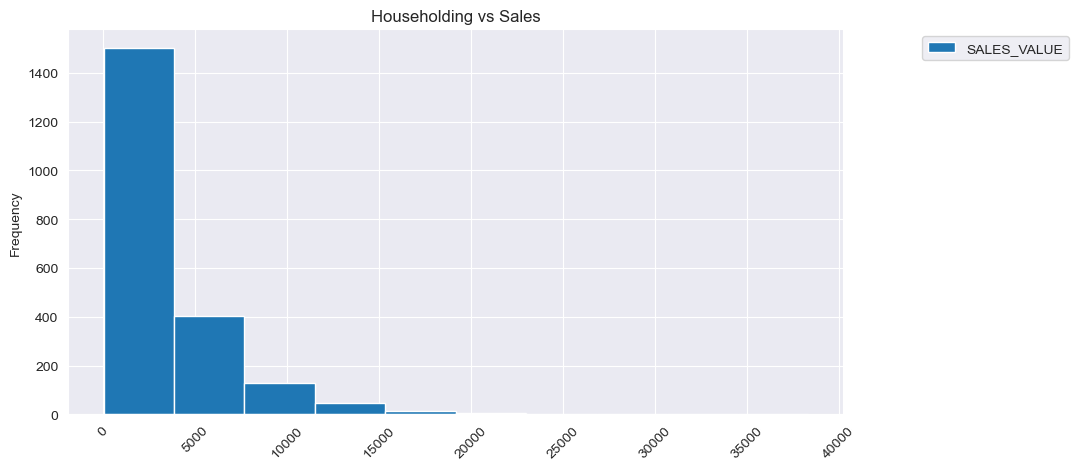

In [231]:
(
    transactions.groupby(["HOUSEHOLD_KEY"]).agg({"SALES_VALUE":'sum'}).
    plot.hist(title = "Householding vs Sales", 
              rot = 45,
              #color = "Red",
              cmap = "tab10",
              grid = True,
              figsize = (10,5))
).legend(bbox_to_anchor = (1.3,1));

In [206]:
transactions.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'WEEK_NO'],
      dtype='object')

In [112]:
(transactions
 .groupby("HOUSEHOLD_KEY")
 .agg({'QUANTITY' : 'sum'})
 .sort_values('QUANTITY' , ascending = 0)
 .head(10)
)

,QUANTITY
HOUSEHOLD_KEY,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


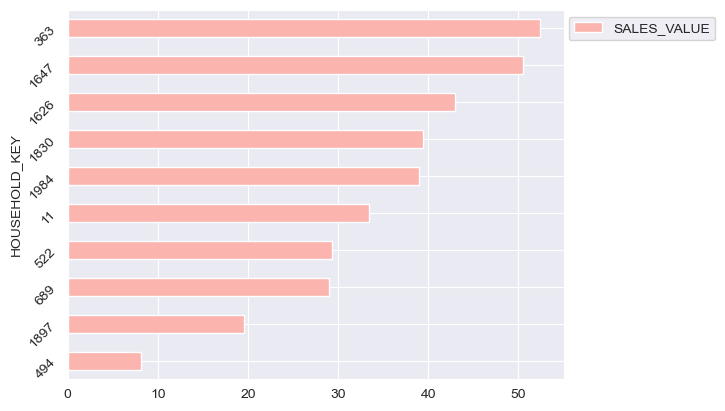

In [240]:
(transactions
 .groupby("HOUSEHOLD_KEY")
 .agg({'SALES_VALUE' : 'sum'})
 .sort_values('SALES_VALUE' , ascending = 1)
 .iloc[:10]
 .plot(kind = 'barh' , rot = 45 , cmap = 'Pastel1')
).legend(bbox_to_anchor = (1.32,1));

Plot the total sales value for our top 10 households by value, ordered from highest to lowest.

In [241]:
import seaborn as sns
sns.set_style('darkgrid')

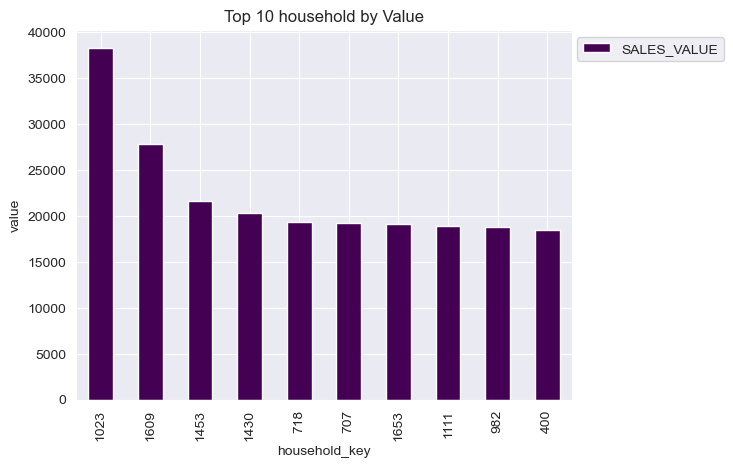

In [95]:
(transactions
 .groupby("HOUSEHOLD_KEY")
 .agg({'SALES_VALUE' : 'sum'})
 .sort_values('SALES_VALUE' , ascending = 0)
 .iloc[:10]
 .plot
 .bar(title = "Top 10 household by Value" , 
     xlabel = "household_key",
     ylabel = "value",
      cmap  = 'viridis'
     )
).legend(bbox_to_anchor = (1.32,1));

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [118]:
transactions["SALES_VALUE"].plot.barh()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000023445185B20> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002344519B420> (for post_execute):


KeyboardInterrupt: 

In [ ]:
transactions.columns

In [ ]:
products = transactions.groupby(by = ["PRODUCT_ID"]).agg({'SALES_VALUE' : 'sum'}).iloc[:10]
(products.sort_values("SALES_VALUE" , ascending = 0)
.plot
.barh( title = "Top Sales Products" , 
      xlabel = "Sales" , 
      ylabel = "Products",
      cmap = "Pastel1"
                  )
).legend(bbox_to_anchor = (1.35,1));

In [ ]:
(transactions
 .query("PRODUCT_ID in @products.index")
 .loc[: ,"total_discount"]
 .sum()
 )
/
(transactions
 .query("PRODUCT_ID in @products.index")
 .loc[: ,"SALES_VALUE"]
 .sum()
 )

In [ ]:
transactions["total_discount"].mean()

In [ ]:
address = "D:\AA\Programming\Data Science\Python\Maven\Data Analysis With Python AND Pandas\Pandas+Course+Resources\Pandas Course Resources\project_data\product.csv"

In [ ]:
products_address = address.replace("\\","/")
products_address

In [ ]:
product_file = pd.read_csv(products_address)
product_file.head()

In [ ]:
top10_sales = product_file.groupby("PRODUCT_ID")[]